# Pytorch Workflow


In [17]:
import torch 
# nn contains all of PyTorch's building blocks for neural networks
from torch import nn 
import matplotlib.pyplot as plt

torch.__version__


# 1. data (preparing and loading)
# data can be almost anything... in machine learning.add()

# Ecxel speardsheet
# Image of any kind
# Videos (YouTube has lots of data...)
# Audio like songs or podcasts
# DNA
# Text

 
# Create known parameters

weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [18]:
len(X), len(y)

(50, 50)

### Splitting data into training and test sets


In [19]:
# Create a train/test split

train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

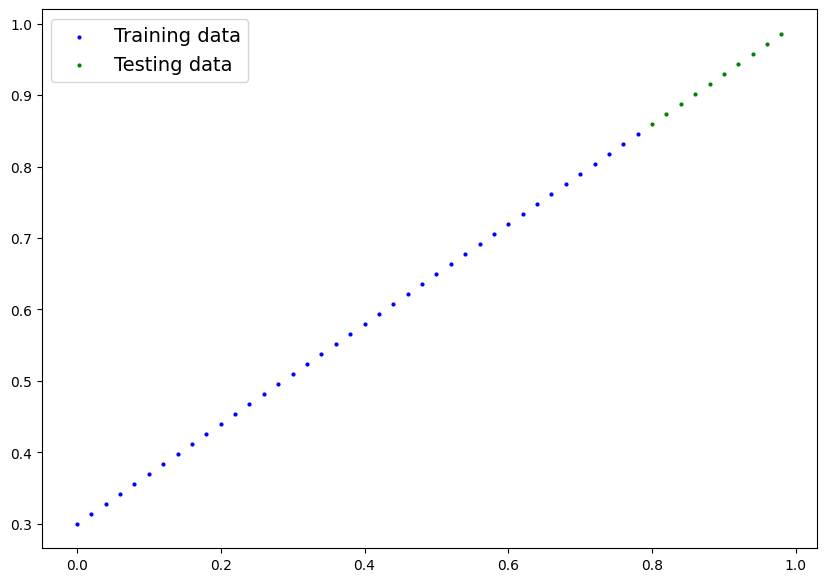

In [ ]:
def plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=None): # type: ignore
    
	# Plots training data, test data and compares predictions. 
	plt.figure(figsize=(10, 7)) # type: ignore
	# Plot training data in blue
	plt.scatter(train_data, train_labels, c="b", s=4, label="Training data") # type: ignore
	# Plot test data in green
	plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data") # type: ignore
	# Are there predictions?
	if predictions is not None:
	# Plot the predictions if they exist
		plt.scatter(test_data, predictions, c="r", s=4, label="Predictions") # type: ignore

	# Show the legend
	plt.legend(prop={"size": 14}) # type: ignore
    
plot_predictions(); 

### Build model


In [37]:
# Create linear regression model class

# almost everything in PyTorch inherhits from nn.Module
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__() # type: ignore
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        
        # Forward method to define the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # type: ignore
        return self.weights * x + self.bias # type: ignore # this is the linear regression formula
        

In [ ]:
# Checking the contents of our PyTorch model

# Create a random seed
torch.manual_seed(42) # type: ignore

# Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [39]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [45]:
y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [48]:
# Make predictions with model

with torch.inference_mode():
    y_preds = model_0(X_test)
    

# You can also do something similar with torch.no_grad(), however, torch.inference_mode() is preferred
# with torch.no_grad(): 
#     y_preds = model_0(X_test)


y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

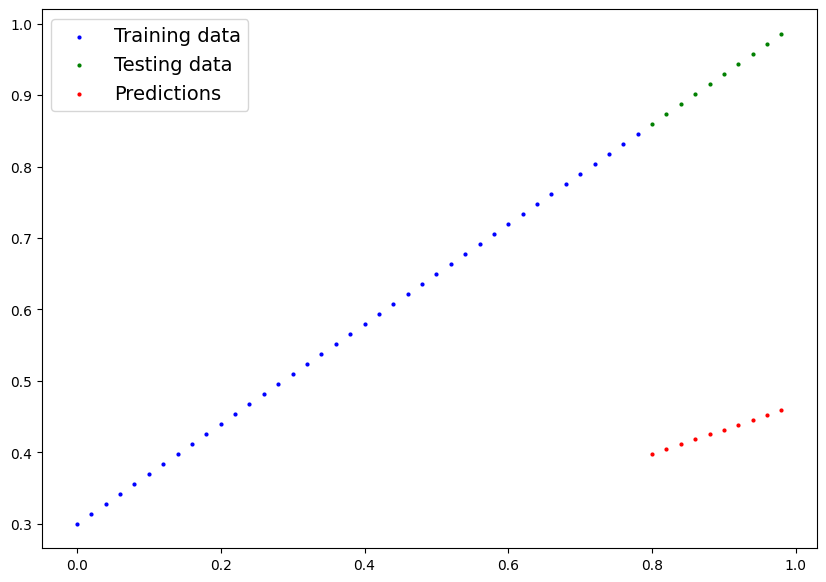

In [43]:
plot_predictions(predictions=y_preds)

In [50]:
# 3. Train model


# Set up a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer
optimizer = torch.optim.SGD(model_0.parameters(), 
                            lr=0.01 #lr = learning rate
                            )
